# SEIR Curves and Agent Characteristics


1. Take in df and separate pages for turtles and plots
2. plot all SEIR  curves
3. Analyze % infected by passenger/crew and scatter plot

## 0. Requirements and Dataframes


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math
import matplotlib.patches as mpatches
import seaborn as sns
plt.rcParams['figure.figsize'] = [16, 8]
bk_line = mpatches.Patch(color='black', label='Average')

In [4]:
#df3 = pd.read_excel('../../data/OverallRuns/run99.xlsx', engine="openpyxl", header=[3,4])
#trt3 = pd.read_excel('../../data/OverallRuns/run03.xlsx', engine="openpyxl", sheet_name='turtles', header=[1])

In [5]:
runs = np.arange(10,100)
runs = np.delete(runs, 52)

In [6]:
runs


array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
       79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
       96, 97, 98, 99])

In [7]:
plots={}
turtles ={}

In [8]:
for i in range(3,10):
    plots['df{0}'.format(i)] =  pd.read_excel('../../data/OverallRuns/run0{0}.xlsx'.format(i), engine="openpyxl",header=[3,4])
    turtles['trt{0}'.format(i)] = pd.read_excel('../../data/OverallRuns/run0{0}.xlsx'.format(i), engine="openpyxl", sheet_name='turtles', header=[1])
    
print("fin")

fin


In [ ]:
for i in runs:
    plots['df{0}'.format(i)] =  pd.read_excel('../../data/OverallRuns/run{0}.xlsx'.format(i), engine="openpyxl", header=[3,4])
    turtles['trt{0}'.format(i)] = pd.read_excel('../../data/OverallRuns/run{0}.xlsx'.format(i), engine="openpyxl", sheet_name='turtles', header=[1])
    
print("fin")

In [16]:
for i in [97,98, 99]:
    plots['df{0}'.format(i)] =  pd.read_excel('../../data/OverallRuns/run{0}.xlsx'.format(i), engine="openpyxl", header=[3,4])
    turtles['trt{0}'.format(i)] = pd.read_excel('../../data/OverallRuns/run{0}.xlsx'.format(i), engine="openpyxl", sheet_name='turtles', header=[1])
    
print("fin")

fin


In [17]:
plots.keys()

dict_keys(['df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10', 'df11', 'df12', 'df13', 'df14', 'df15', 'df16', 'df17', 'df18', 'df19', 'df20', 'df21', 'df22', 'df23', 'df24', 'df25', 'df26', 'df27', 'df28', 'df29', 'df30', 'df31', 'df32', 'df33', 'df34', 'df35', 'df36', 'df37', 'df38', 'df39', 'df40', 'df41', 'df42', 'df43', 'df44', 'df45', 'df46', 'df47', 'df48', 'df49', 'df50', 'df51', 'df52', 'df53', 'df54', 'df55', 'df56', 'df57', 'df58', 'df59', 'df60', 'df61', 'df63', 'df64', 'df65', 'df66', 'df67', 'df68', 'df69', 'df70', 'df71', 'df72', 'df73', 'df74', 'df75', 'df76', 'df77', 'df78', 'df79', 'df80', 'df81', 'df82', 'df83', 'df84', 'df85', 'df86', 'df87', 'df88', 'df89', 'df90', 'df91', 'df92', 'df93', 'df94', 'df95', 'df96', 'df97', 'df98', 'df99'])

# 1. SEIR Plots

In [56]:
keys = list(plots.keys())
exp_arr = []
inf_arr = []
for k in keys:
    exp_arr.append((plots[str(k)]['"Exposed"']['y'][0:6001]))
    inf_arr.append(np.log(plots[str(k)]['"Infections"']['y'][0:6001]))

In [85]:
keys = list(plots.keys())
x_arr = []
for k in keys:
    x_arr.append(plots[str(k)]['"Infections"']['y'][0:6001])

In [22]:
e_means = [np.mean(k) for k in zip(*exp_arr)]

In [57]:
i_means = [np.mean(k) for k in zip(*inf_arr)]

In [86]:
x_means = [np.mean(k) for k in zip(*x_arr)]

In [93]:
x_means[-1]

34.447916666666664

In [27]:
len(e_means)

6001

<ipython-input-81-add42a4c7c59>:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(['Average'],loc='upper left', handles=[bk_line])


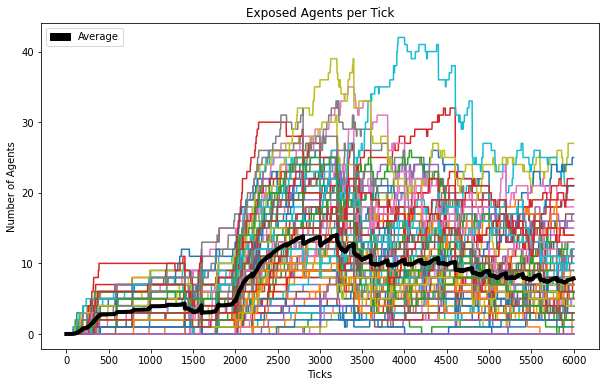

In [81]:
for a in range(len(exp_arr)):
    plt.plot(np.arange(0,6001),exp_arr[a])
plt.plot(np.arange(0,6001), e_means, color='k',linewidth=4.0)

plt.legend(['Average'],loc='upper left', handles=[bk_line])
plt.title('Exposed Agents per Tick')
plt.xlabel('Ticks')
plt.ylabel('Number of Agents')
plt.xticks(range(0,6200,500))
plt.savefig('../../plots/exp_tot.png', transparent=True)
plt.show()

In [ ]:
for a in range(len(exp_arr)):
    plt.plot(np.arange(0,6001),inf_arr[a])
plt.plot(np.arange(0,6001), i_means, color='k',linewidth=4.0)

plt.legend(['Average'],loc='upper left', handles=[bk_line])
plt.title('Infected Agents per Tick')
plt.xlabel('Ticks')
plt.ylabel('Number of Agents')
plt.xticks(range(0,6200,500))
#plt.savefig('../../plots/exp_tot.png', transparent=True)
plt.show()

In [73]:
m1

0.0004871912260518426

<ipython-input-82-1957db94a443>:10: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(['Average'],loc='upper left', handles=[bk_line])


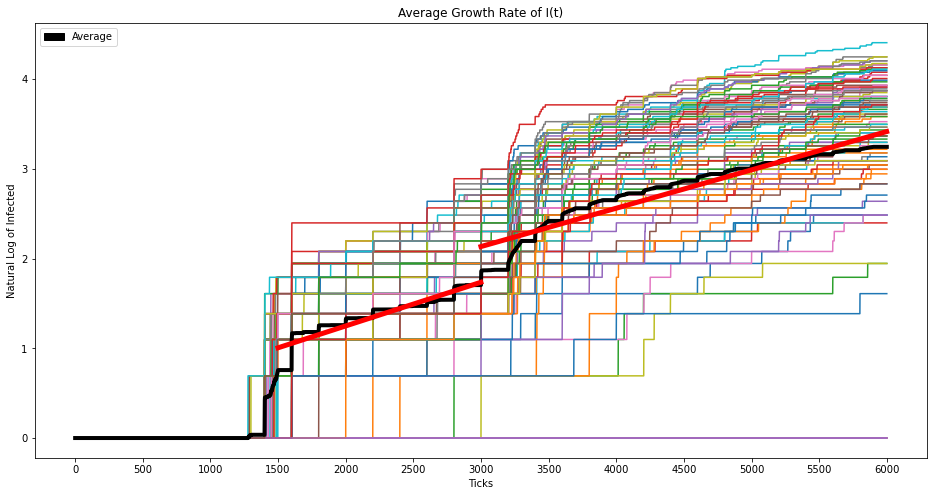

In [82]:
for a in range(len(inf_arr)):
    plt.plot(np.arange(0,6001),inf_arr[a])
plt.plot(np.arange(0,6001), i_means, color='k',linewidth=4.0)
plt.plot(np.arange(1500,3000), m1*np.arange(1500,3000) +b1, color ='red', linewidth=5.0)
plt.plot(np.arange(3000,6000), m2*np.arange(3000,6000) +b2, color ='red', linewidth=5.0)


#plt.axvline(2000, color='black', linestyle='solid', linewidth=3)
#plt.text(2050, 42.7, 'Passenger/Infected Quarantine at Day 10')
plt.legend(['Average'],loc='upper left', handles=[bk_line])
plt.title('Average Growth Rate of I(t)')
plt.xlabel('Ticks')
plt.ylabel('Natural Log of Infected')
plt.xticks(range(0,6200,500))
plt.savefig('../../plots/ln_inf.png', transparent=True)
plt.show()
#ALSO AD SLOPE OF LINE TO PLOT

In [58]:
m1, b1 = np.polyfit(np.arange(1500,3000), i_means[1500:3000], 1)

In [59]:
m2, b2 = np.polyfit(np.arange(3000,6000), i_means[3000:6000], 1)

In [60]:
m1, b1


(0.0004871912260518426, 0.2751116752262712)

In [61]:
m2, b2

(0.00042741447845087976, 0.8519614277301307)

In [11]:
for a in plots.keys():
    np.mean(np.array([ old_set, new_set ]), axis=0)

'df99'

# 2. Turtle Analysis

135 is pink (passengers), 85 is cyan (crew)

In [113]:
inits = [3,4,5,6,7,8,9]
lables = np.append(inits, runs)
lables.shape

(96,)

In [ ]:
me = crews['trt12'].groupby('indexcolor').describe().reset_index()
me

In [43]:
m1 = me[me['indexcolor']>0]
m1.where(m1.indexcolor ==85).who['count'].sum()
#m1.who['count'].sum()
   # run.append(me.where(me.indexcolor <100)['who']['count'].iloc[0])

NameError: name 'me' is not defined

In [114]:
for df in turtles.keys():
    turtles[df].indexcolor = turtles[df].indexcolor.apply(lambda x: 0 if x==999 else x)

In [115]:
crews = {}
passe = {}
for a in turtles.keys():
    passe[a] = turtles[a][turtles[a].color ==135]
    crews[a] = turtles[a][turtles[a].color == 85]

In [116]:
crew_a = []
pass_a = []
tot_c = []
tot_p = []
for a in crews.keys():
    littlecrew = []
    moi = crews[a].groupby('indexcolor').describe().reset_index()
    littlecrew.append(moi.where(moi.indexcolor ==85).who['count'].sum())
    littlecrew.append(moi.where(moi.indexcolor ==135).who['count'].sum())
    littlecrew.append(moi.where(moi.indexcolor>0).who['count'].sum())
    crew_a.append(littlecrew)
    
    littlepass = []
    moi = passe[a].groupby('indexcolor').describe().reset_index()
    littlepass.append(moi.where(moi.indexcolor ==85).who['count'].sum())
    littlepass.append(moi.where(moi.indexcolor ==135).who['count'].sum())
    littlepass.append(moi.where(moi.indexcolor>0).who['count'].sum())
    pass_a.append(littlepass)
    
    moix = turtles[a].groupby('indexcolor').describe().reset_index()
    tot_c.append(moix.where(moix.indexcolor==85).who['count'].sum())
    tot_p.append(moix.where(moix.indexcolor==135).who['count'].sum())
    
    

In [118]:
tot_a = pd.DataFrame([crew_a, pass_a, tot_c, tot_p]).T
tot_a.columns =['crew','passengers','crew_tot','pass_tot']


In [119]:
tot_a.stack().str[0].unstack().crew / tot_a.stack().str[2].unstack().crew

0     0.000000
1          NaN
2          NaN
3     0.937500
4          NaN
        ...   
91    0.000000
92    0.000000
93    0.787879
94         NaN
95    0.000000
Name: crew, Length: 96, dtype: float64

In [153]:
#x infected by y
tot_a['tot'] = tot_a.stack().str[2].unstack().crew + tot_a.stack().str[2].unstack().passengers
tot_a['cc'] = tot_a.stack().str[0].unstack().crew #/ tot_a.stack().str[2].unstack().crew
tot_a['cp'] = tot_a.stack().str[1].unstack().crew #/ tot_a.stack().str[2].unstack().crew 
tot_a['pp'] = tot_a.stack().str[1].unstack().passengers #/ tot_a.stack().str[2].unstack().passengers
tot_a['pc'] = tot_a.stack().str[0].unstack().passengers #/ tot_a.stack().str[2].unstack().passengers

In [154]:
tot_a

,crew,passengers,crew_tot,pass_tot,tot,cc,cp,pp,pc
0,"[0.0, 14.0, 14.0]","[0.0, 26.0, 26.0]",0.0,40.0,40.0,0.0,14.0,26.0,0.0
1,"[0.0, 0.0, 0.0]","[0.0, 28.0, 28.0]",0.0,28.0,28.0,0.0,0.0,28.0,0.0
2,"[0.0, 0.0, 0.0]","[0.0, 12.0, 12.0]",0.0,12.0,12.0,0.0,0.0,12.0,0.0
3,"[30.0, 2.0, 32.0]","[0.0, 43.0, 43.0]",30.0,45.0,75.0,30.0,2.0,43.0,0.0
4,"[0.0, 0.0, 0.0]","[0.0, 5.0, 5.0]",0.0,5.0,5.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...
91,"[0.0, 7.0, 7.0]","[0.0, 33.0, 33.0]",0.0,40.0,40.0,0.0,7.0,33.0,0.0
92,"[0.0, 3.0, 3.0]","[0.0, 46.0, 46.0]",0.0,49.0,49.0,0.0,3.0,46.0,0.0
93,"[26.0, 7.0, 33.0]","[0.0, 36.0, 36.0]",26.0,43.0,69.0,26.0,7.0,36.0,0.0
94,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Turtles Plots

## Bar Plots

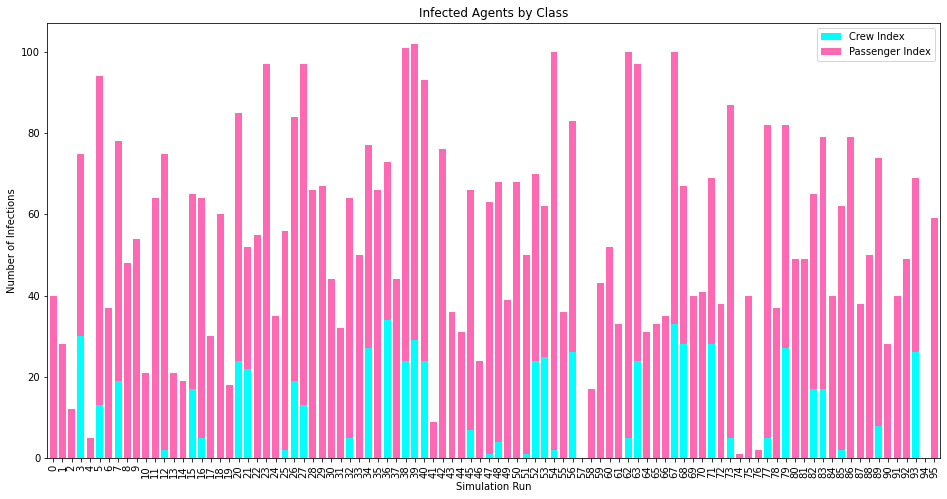

In [152]:
#plt.figure(figsize=(30,8)) CHANGE PLOT SIZE IN INITIALIZER @ BEGINNING FOR SMALLER
ax = tot_a[['crew_tot','pass_tot']].plot.bar(stacked=True, width=0.75,color={'crew_tot':'cyan','pass_tot':'hotpink'})
#plt.legend(['Average'],loc='upper left', handles=[bk_line])
plt.title('Infected Agents by Class')
plt.xlabel('Simulation Run')
plt.ylabel('Number of Infections')
plt.legend(labels=['Crew Index', 'Passenger Index'])
ax
plt.savefig('../../plots/classinf.png', transparent=True)

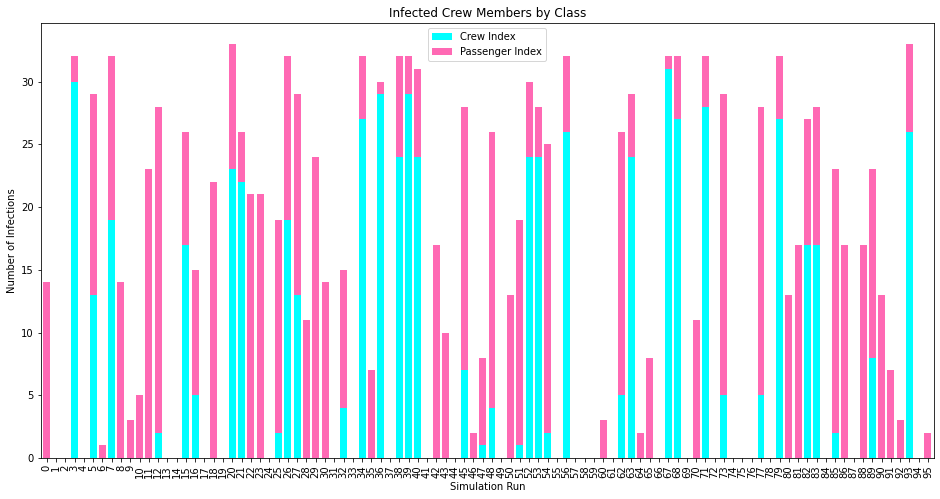

In [171]:
ax = tot_a[['cc', 'cp']].plot.bar(stacked=True, width=0.75,
                                            color={'cc':'cyan','cp':'hotpink'})
plt.title('Infected Crew Members by Class')
plt.xlabel('Simulation Run')
plt.ylabel('Number of Infections')
plt.legend(labels=['Crew Index', 'Passenger Index'])
ax
plt.savefig('../../plots/crewinf.png', transparent=True)



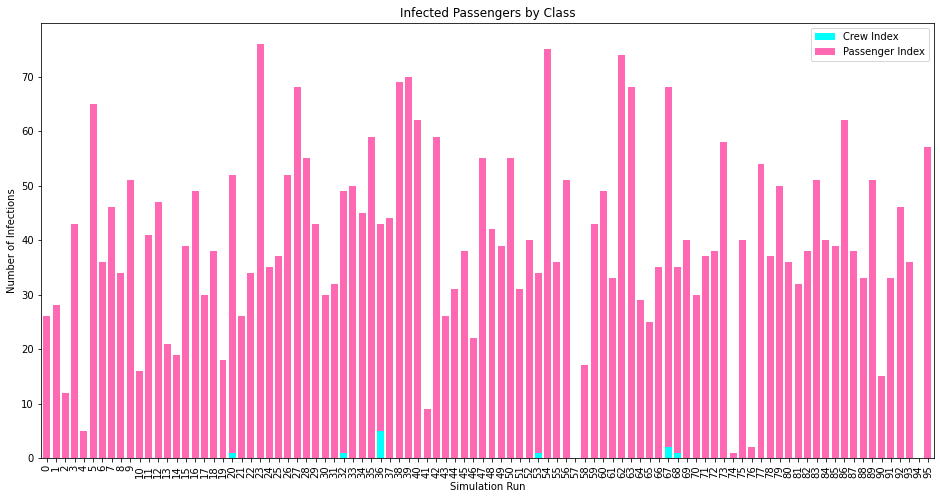

In [170]:
ax = tot_a[['pc', 'pp']].plot.bar(stacked=True, width=0.75,
                                            color={'pc':'cyan','pp':'hotpink'})

plt.title('Infected Passengers by Class')
plt.xlabel('Simulation Run')
plt.ylabel('Number of Infections')
plt.legend(labels=['Crew Index', 'Passenger Index'])
ax
plt.savefig('../../plots/passinf.png', transparent=True)
plt.show()


In [ ]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
>>> lifespan = [2, 8, 70, 1.5, 25, 12, 28]
>>> index = ['snail', 'pig', 'elephant',
...          'rabbit', 'giraffe', 'coyote', 'horse']
>>> df = pd.DataFrame({'speed': speed,
...                    'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

## Box Plots

In [271]:
tot_a

,crew,passengers,cc,cp,pp,pc
0,"[0.0, 14.0, 14.0]","[0.0, 26.0, 26.0]",0.000000,1.000000,1.0,0.0
1,"[0.0, 0.0, 0.0]","[0.0, 28.0, 28.0]",NaN,NaN,1.0,0.0
2,"[0.0, 0.0, 0.0]","[0.0, 12.0, 12.0]",NaN,NaN,1.0,0.0
3,"[30.0, 2.0, 32.0]","[0.0, 43.0, 43.0]",0.937500,0.062500,1.0,0.0
4,"[0.0, 0.0, 0.0]","[0.0, 5.0, 5.0]",NaN,NaN,1.0,0.0
...,...,...,...,...,...,...
91,"[0.0, 7.0, 7.0]","[0.0, 33.0, 33.0]",0.000000,1.000000,1.0,0.0
92,"[0.0, 3.0, 3.0]","[0.0, 46.0, 46.0]",0.000000,1.000000,1.0,0.0
93,"[26.0, 7.0, 33.0]","[0.0, 36.0, 36.0]",0.787879,0.212121,1.0,0.0
94,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN


In [122]:
sns.set_theme(style="white")
#for a in turtles.keys():
df = crews[a].groupby(['color', 'indexcolor']).describe().reset_index()


In [20]:
colors = []
for i in turtles.keys():
    me = turtles[i].groupby(['indexcolor']).describe().reset_index().iloc[1:]
    #[total, pink, cyan]
    run = []
    run.append(me['who']['count'].sum())
    run.append((me.where(me.indexcolor >100)['who']['count'].iloc[0]))
    run.append(me.where(me.indexcolor <100)['who']['count'].iloc[0])
    colors.append(run)
print('fin')

IndexError: single positional indexer is out-of-bounds

In [ ]:
display(turtles['trt3'].groupby(['exposed?', 'indexcolor']).describe())
display(turtles['trt3'].groupby(['asymptomatic?','symptomatic?','indexcolor']).describe())
display(turtles['trt3'].groupby(['recovered?', 'indexcolor']).describe())


### Plots I Would like to Create:
* histogram with total infected as size of bar plot, colored by index color
* scatter? of those infected by within group, outside group
     * may be a better type of graph to produce

# Calculating Reproductive Number
     look at the new plots fo rI
     take ln of infected and find slope (b4 and after quarantine takes hold)
     use slope and equation from {Vynycky} to calculate
     
     d = infected period
     d' = exposed period
     *200 to show it is days
   (1 + m1*200*d)(1+m1*200*d')for ticks 1500-3000
   R01 = 2.02989
   
   (1 + m2*200*d)(1+m2*200*d')for ticks 3000-6000
   R02= 1.89988
   
   divide by beta * 6 to show effective contact number
   R01 / (.208*6) = 1.62651
   R02 / (.208*6) = 1.52234
   

In [72]:
round((1+(m1*200*6))*(1+(m1*200*20)),4)

4.6727

In [71]:
round((1+(m2*200*6))*(1+(m2*200*20)),4)

4.0994